1.	Write a function xor_decrypt(encrypted_text, key) that gets a list of numbers and a key (as string) and decrypts this list into a text (as string again). 

In [1]:
def xor_decrypt(encrypted_text, key):
    # Convert the key to a list of ASCII codes
    key_codes = [ord(c) for c in key]
    # Decrypt each byte of the encrypted text using the key
    decrypted_bytes = [byte ^ key_codes[i % len(key_codes)] for i, byte in enumerate(encrypted_text)]
    # Convert the decrypted bytes to a string
    decrypted_text = ''.join([chr(byte) for byte in decrypted_bytes])
    return decrypted_text

Function explanation:


In [2]:
key_length = 2
encrypted_text_length = 7
for i in range(encrypted_text_length):
    print(i, "% " + str(key_length) + " =", i % key_length)

0 % 2 = 0
1 % 2 = 1
2 % 2 = 0
3 % 2 = 1
4 % 2 = 0
5 % 2 = 1
6 % 2 = 0


function example:

In [3]:
xor_decrypt([24,24,26,30,28], "yz")

'abcde'

2.	Write a function guess_key(encrypted_text, key_size) that tries to break a XOR encryption by a brute-force attack under the following assumptions:
a.	The decrypted text contains a standard English text containing only letters, numbers, punctuation marks, etc.<br>
b.	The encryption key consists of key_size lower-case English characters.<br>

	The function will return a list of possible matches as pairs of keys and
	possibly-decrypted text.


In [4]:
import itertools
import string
import re

First we will build a function generate_keys(key_size) that will return a list of all possible combination of the keys:

In [5]:
def generate_keys(key_size, chars = string.ascii_lowercase):
    #The encryption key consists of key_size lower-case English characters - 'abcdefghijklmnopqrstuvwxyz' (26 letters)
    all_possible_combinations = itertools.product(chars, repeat=key_size) #Iterator with all possible combinations of chars
    return [''.join(key) for key in all_possible_combinations] #All possible combinations key result in a list

Example of first 10 elements for keysize = 2:

In [6]:
generate_keys(2)[0:10]

['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj']

The number of elements in the list can be given by the equation: len(chars) ** keysize:

In [6]:
len(generate_keys(3))

17576

In [7]:
26**3

17576

As you can see the number of chars of the original message and the length of the secret key has a factor of how many results we need to filter out.

The generated keys above is an input to the guess_key() function that tries to decrypt an encrypt message.
in my answer i wrote 3 functions: <br>
guess_key_re_filter() -  that uses a regular expression filter <br> guess_key_space_filter() -  uses space counter filter.<br>
guess_key() -  combine the two filters

In [7]:
def guess_key_re_filter(encrypted_text, key_size, filter_result=True, pattern = r'^[a-zA-Z0-9 \.,\?!\'"\-\–;:\(\)]+$'):
    possible_keys = []
    try:
        for key in generate_keys(key_size):
            decrypted_text = xor_decrypt(encrypted_text, key)
            if filter_result:
                if re.match(pattern, decrypted_text):
                    possible_keys.append((key, decrypted_text))
            else:
                possible_keys.append((key, decrypted_text))
    except Exception as e:
        print(f"An error occurred: {e}")
    return possible_keys

In [113]:
def guess_key_space_filter(encrypted_text, key_size, filter_result=True, spaces_th = 140):
    possible_keys = []
    try:
        for key in generate_keys(key_size):
            decrypted_text = xor_decrypt(encrypted_text, key)
            if filter_result:
                if decrypted_text.count(" ") >= spaces_th:
                    possible_keys.append((key, decrypted_text))
            else:
                possible_keys.append((key, decrypted_text))
    except Exception as e:
        print(f"An error occurred: {e}")
        raise
    return possible_keys

In [105]:
def guess_key(encrypted_text, key_size, re_filter=False, re_pattern=r'^[a-zA-Z0-9 \.,\?!\'"\-\–;:\(\)]+$', space_filter=False, spaces_th=140):
    possible_keys = []
    try:
        for key in generate_keys(key_size):
            decrypted_text = xor_decrypt(encrypted_text, key)
            if (re_filter and re.match(re_pattern, decrypted_text)) or (space_filter and decrypted_text.count(" ") >= spaces_th):
                possible_keys.append((key, decrypted_text))
    except Exception as e:
        print(f"An error occurred: {e}")
    return possible_keys

3.Run your result on the “cipher.txt” file provided with key size of 3. <br>
the result (after filtering) should be a readable English text

In [92]:
file_path = r"C:\Users\JonathanDanzig\Downloads\q\cipher.txt"

In [93]:
def encrypted_textfile_to_list(filename):
    with open(filename, 'r') as f:
        encrypted_text = f.read().strip().split(',') #list of numbers (presented as text).
        encrypted_list = [int(x) for x in encrypted_text] #list of numbers int casted.
    return encrypted_list

In [94]:
encrypted_message = encrypted_textfile_to_list(file_path)

First 10 elements in the cipher.txt file:

In [95]:
print(encrypted_message[0:20])

[46, 14, 14, 1, 79, 15, 8, 79, 43, 30, 7, 15, 12, 10, 14, 67, 79, 49, 2, 2]


In [13]:
#Finding results with re-filter:
L1 = guess_key_re_filter(encrypted_message, key_size=3, filter_result=True)

In [14]:
L1

[('mob',
  "Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but kne

In [31]:
#Finding results with space-filter:

The average word in the English language is 4.7 characters => a guess for spase_th would be 0.7*(len(encrypted_message)/4.7-1)

In [37]:
 round(0.7*(len(encrypted_message)/4.7-1))

165

In [38]:
L2 = guess_key_space_filter(encrypted_message, key_size=3, filter_result=True, spaces_th=165)

In [39]:
#decrypt-message
print(L2[0][1])

Call me Ishmael. Some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people's hats off--then, I account it high time to get to sea as soon as I can. This is my substitute for pistol and ball. With a philosophical flourish Cato throws himself upon his sword; I quietly take to the ship. There is nothing surprising in this. If they but knew it, almost

In [40]:
#key that we found:
print(L2[0][0])

mob


In [53]:
#Another way is to count the maximum spaces found is all messages:

In [54]:
L = guess_key_re_filter(encrypted_message, key_size=3, filter_result=False)
max_space_count = 0
message = ''
pos = ''
for i in range(len(L)):
    count = L[i][1].count(" ")
    if count > max_space_count:
        max_space_count = count
        message = L[i][1]
        pos = i

In [55]:
#the maximum spaces that were found:
max_space_count

197

In [57]:
#for code
L[pos][0]

'mob'

In [50]:
#We can also plot it using pandas and matplotlib.

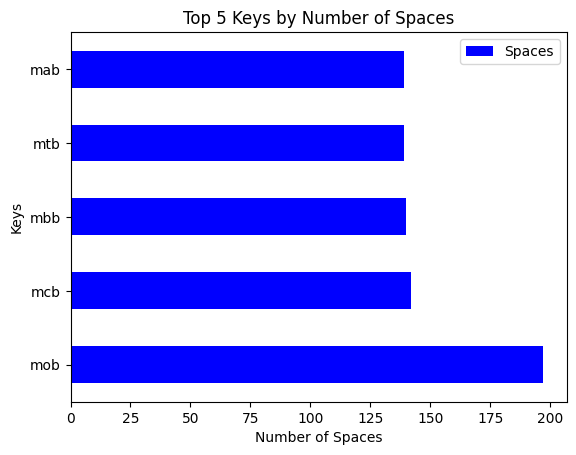

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

L = guess_key_re_filter(encrypted_message, key_size=3, filter_result=False)
keys = []
spaces = []
for i in range(len(L)):
    spaces.append(L[i][1].count(" "))
    keys.append(L[i][0])

# Create a pandas dataframe from x and y lists
df = pd.DataFrame({'Keys':keys, 'Spaces': spaces})

# Sort the dataframe by count in descending order
df = df.sort_values('Spaces', ascending=False)

# Take the top 5 rows
top_5 = df[:5]

# plot the first 5 values in a horizontal bar chart
ax = top_5.plot(kind='barh', x='Keys', y='Spaces', color='blue')

# set the plot title and labels
ax.set_title('Top 5 Keys by Number of Spaces')
ax.set_xlabel('Number of Spaces')
ax.set_ylabel('Keys')

plt.show()

In [79]:
top_5

,Keys,Spaces
8477,mob,197
8165,mcb,142
8139,mbb,140
8607,mtb,139
8113,mab,139


4.	Using any Python test framework of your choice, write basic tests to ensure guess_key is working as expected (including testing of your filtering mechanism or error handling if such exists).

In [117]:
#Check python file for full answer... pytest did not run very well for me in jupyter notebook

In [15]:
#writing our own xor_encrypt(normal_text, key) function that will return an encrypt list of numbers.

In [118]:
def xor_encrypt(normal_text, key):
    # Convert the key to a list of ASCII codes
    key_codes = [ord(c) for c in key]
    # Convert the normal text input to list of ASCII decinal codes.
    Ascii_List = [ord(i) for i in normal_text]
    # Encrypt each byte of the normal text list using the key
    Encrypted_bytes = [byte ^ key_codes[i % len(key_codes)] for i, byte in enumerate(Ascii_List)]
    return Encrypted_bytes

In [119]:
secret_message = ("Most secret operational order No. 3. In accordance with agreement with Japan, U-boat war is to be extended to include all enemy ships in the western Atlantic as far as 35 degrees West longitude, regardless of flag.")
print("message spaces: ", secret_message.count(" "))
print("message length: ", len(secret_message))
key = "xy"
encrypt_message = xor_encrypt(secret_message, key)
print("estimated spaces: ", round(0.7*(len(encrypt_message)/4.7-1)))

message spaces:  36
message length:  214
estimated spaces:  31


In [120]:
result = guess_key_space_filter(encrypt_message, len(key), spaces_th= round(0.7*(len(encrypt_message)/4.7-1)))

In [121]:
result

[('xy',
  'Most secret operational order No. 3. In accordance with agreement with Japan, U-boat war is to be extended to include all enemy ships in the western Atlantic as far as 35 degrees West longitude, regardless of flag.')]

In [72]:
import testbook
import pytest

In [96]:
def test_guess_key_space_filter():
    # Create a sample encrypted message and key
    message = ("Most secret operational order No. 3. In accordance with agreement with Japan, U-boat war is to be extended to include all enemy ships in the western Atlantic as far as 35 degrees West longitude, regardless of flag.")
    key = "xy"
    encrypt_message = xor_encrypt(message, key)

    # Test with default parameters
    est_spaces_th = round(0.7*(len(encrypt_message)/4.7-1))
    result = guess_key_space_filter(encrypt_message, key_size = len(key), filter_result=True, spaces_th = guess_spaces_th)
    assert len(result) == 1
    assert result[0][0] == key
    assert result[0][1] == message

@testbook.testbook(r'C:\Users\JonathanDanzig\Downloads\q\q.ipynb', execute=True, timeout=60)
def test_my_notebook(tb):

    # Call the function that contains your test
    test_guess_key_space_filter()
    
    # Check that the test passed
    assert '1 passed' in tb.execute_cell('!pytest --verbose')['stdout']
    